In [24]:
# %pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
 
od.download('https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption')

Skipping, found downloaded files in ".\hourly-energy-consumption" (use force=True to force download)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [26]:
df = pd.read_csv('hourly-energy-consumption/PJME_hourly.csv').set_index('Datetime')
df.index = pd.to_datetime(df.index)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


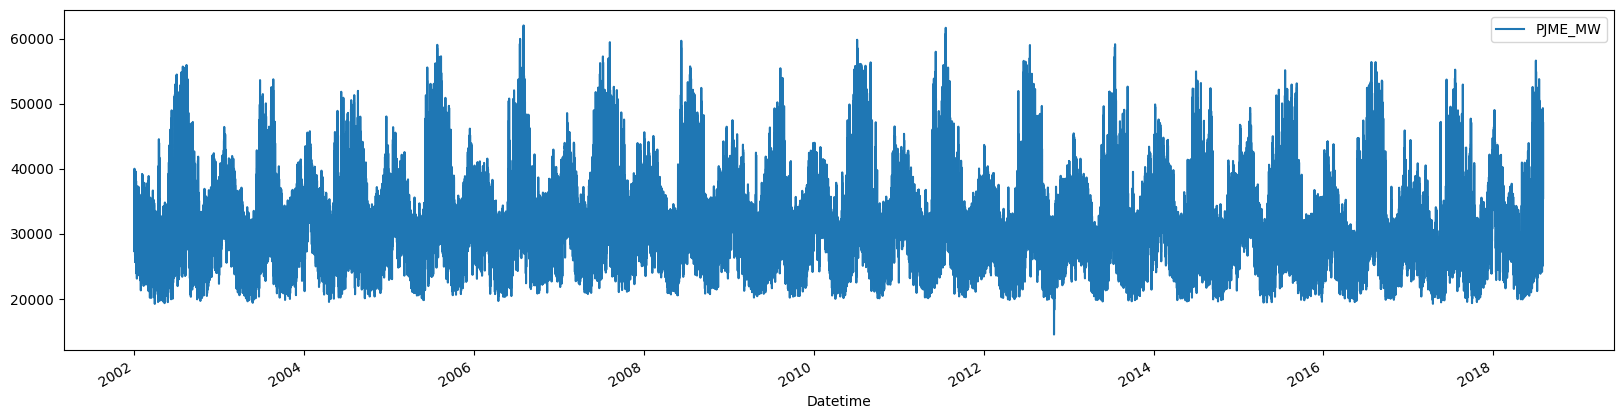

In [27]:
df.plot(figsize=(20, 5))
df

<AxesSubplot: ylabel='Frequency'>

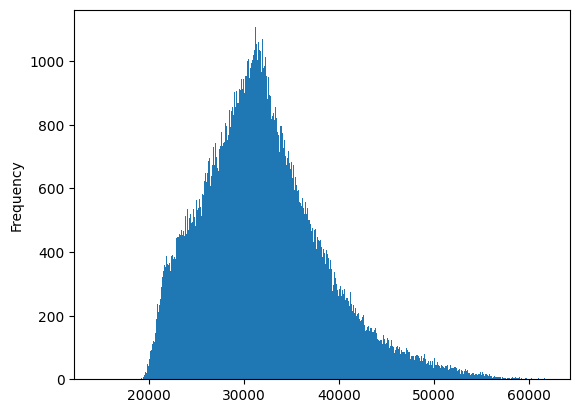

In [28]:
#Outlier Detection

df['PJME_MW'].plot(kind='hist', bins=500)

<AxesSubplot: xlabel='Datetime'>

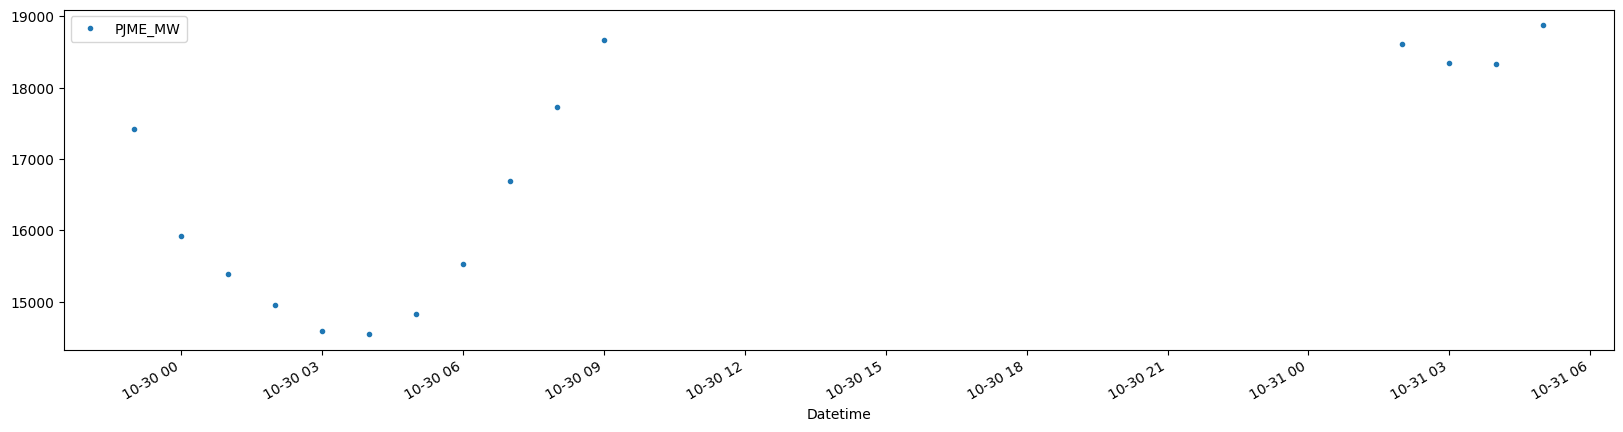

In [29]:
df.query('PJME_MW < 19000').plot(figsize=(20, 5), style='.')

In [30]:
df = df.query('PJME_MW > 19000')

<AxesSubplot: xlabel='Datetime'>

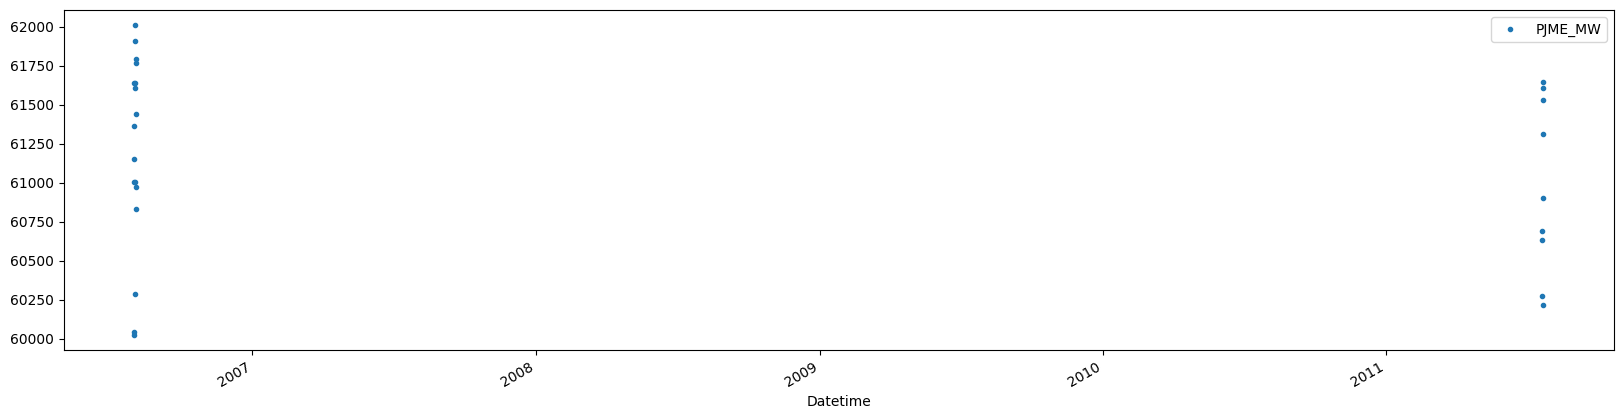

In [42]:
df.query('PJME_MW > 60000').plot(figsize=(20, 5), style='.')

### Time Series Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tes = TimeSeriesSplit(n_splits=5, test_size=0.2)

In [32]:
# train  = df[df.index.year < 2015]
# test = df[df.index.year >= 2015]

# fig, ax = plt.subplots(figsize=(15, 5))
# train.plot(ax=ax,  label='train')
# test.plot(ax=ax, label='test')
# ax.axvline(test.index[0], color='r', linestyle='--')